In [174]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import glob

In [175]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [176]:
# read data from multipe files as each files contains information related to each station.
# there are 12 stations in Total so we need to read data from 12 csv files and merge into one single dataframe
File_Path = r'C:\Users\Air Quality'
Files = glob.glob(File_Path + "/*.csv")
Data_Frame = []
for i in Files:
    df = pd.read_csv(i, index_col=None, header=0)
    Data_Frame.append(df)
Air_Qdata = pd.concat(Data_Frame)
Air_Qdata

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
35060  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
35061  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
35062  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
35063  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin  
1      -1.1  1023.2 -18.2   0.0    N   4.7   Aotizhongxin  
2      -1.1  1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin  
3      -1.4  1024.5 -19.4   0.0   NW   3.1   Aotizhongxin  
4      -2.0  1025.2 -19.5   0.0    N   2.0   Aotizhongxin  
...     ...     ...   ...   ...  ...   ...            ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  

[420768 rows x 18 columns]

In [177]:
# drop the row no column as it is not necessary for our analysis
Air_Qdata.drop(["No"], axis=1, inplace=True)

In [178]:
def check_null_percentage(dataframe):
    "A function to check the percentage of Null values in a dataframe"
    total_rows = dataframe.shape[0]
    null_percentages = (dataframe.isnull().sum() / total_rows * 100).round(2)
    null_percentages = null_percentages.astype(str) + '%'
    return null_percentages

In [179]:
null_percentages = check_null_percentage(Air_Qdata)
print(null_percentages)

year        0.0%
month       0.0%
day         0.0%
hour        0.0%
PM2.5      2.08%
PM10       1.53%
SO2        2.14%
NO2        2.88%
CO         4.92%
O3         3.16%
TEMP       0.09%
PRES       0.09%
DEWP        0.1%
RAIN       0.09%
wd         0.43%
WSPM       0.08%
station     0.0%
dtype: object


In [180]:
def identify_data_types(dataframe):
    "A function to check the datatype of each column"
    integer_columns = []
    float_columns = []
    string_columns = []

    for column in dataframe.columns:
        if np.issubdtype(dataframe[column].dtype, np.integer):
            integer_columns.append(column)
        elif np.issubdtype(dataframe[column].dtype, np.floating):
            float_columns.append(column)
        elif dataframe[column].dtype == object:
            string_columns.append(column)

    return integer_columns, float_columns, string_columns

In [181]:
integer_columns, float_columns, string_columns = identify_data_types(data)
print("Integer Columns:", integer_columns)
print("String Columns:", string_columns)
print("float_columns:",float_columns)

Integer Columns: ['year', 'month', 'day', 'hour']
String Columns: ['wd', 'station']
float_columns: ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


In [182]:
def fill_missing_with_monthly_mean(dataframe, columns):
    " A function to replace the NULL values with mean value for each column of each month"
    dataframe_filled = dataframe.copy()

    for column in columns:
        dataframe_filled[column] = dataframe.groupby(dataframe['month'])[column].transform(lambda x: x.fillna(x.mean()))

    return dataframe_filled



columns_to_fill = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
filled_df = fill_missing_with_monthly_mean(data, columns_to_fill)
print(filled_df)


       year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0      2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1      2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2      2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3      2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4      2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   
...     ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   ...   
35059  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0  12.5   
35060  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0  11.6   
35061  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0  10.8   
35062  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0  10.5   
35063  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   8.6   

         PRES  DEWP  RAIN   wd  WSPM        station  
0      1023.0 -18.8  

In [183]:
#check again the null values
null_percentages = check_null_percentage(filled_df)
print(null_percentages)

year        0.0%
month       0.0%
day         0.0%
hour        0.0%
PM2.5       0.0%
PM10        0.0%
SO2         0.0%
NO2         0.0%
CO          0.0%
O3          0.0%
TEMP        0.0%
PRES        0.0%
DEWP        0.0%
RAIN        0.0%
wd         0.43%
WSPM        0.0%
station     0.0%
dtype: object


In [184]:
#Replace the NULL values in wd column with mean of each station
def fill_with_mode(dataframe, column_to_fill, reference_column):
    mode_values = dataframe.groupby(reference_column)[column_to_fill].apply(lambda x: x.mode()[0])
    dataframe[column_to_fill] = dataframe.apply(lambda row: mode_values[row[reference_column]]
                                                if pd.isnull(row[column_to_fill]) else row[column_to_fill],
                                                axis=1)
    return dataframe


filled_df = fill_with_mode(filled_df, 'wd', 'station')
print(filled_df)

       year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0      2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1      2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2      2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3      2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4      2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   
...     ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   ...   
35059  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0  12.5   
35060  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0  11.6   
35061  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0  10.8   
35062  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0  10.5   
35063  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   8.6   

         PRES  DEWP  RAIN   wd  WSPM        station  
0      1023.0 -18.8  

In [185]:
#check again the null values
null_percentages = check_null_percentage(filled_df)
print(null_percentages)

year       0.0%
month      0.0%
day        0.0%
hour       0.0%
PM2.5      0.0%
PM10       0.0%
SO2        0.0%
NO2        0.0%
CO         0.0%
O3         0.0%
TEMP       0.0%
PRES       0.0%
DEWP       0.0%
RAIN       0.0%
wd         0.0%
WSPM       0.0%
station    0.0%
dtype: object


Explotary Data Analysis and Data Visualization

In [186]:
filled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    420768 non-null  float64
 5   PM10     420768 non-null  float64
 6   SO2      420768 non-null  float64
 7   NO2      420768 non-null  float64
 8   CO       420768 non-null  float64
 9   O3       420768 non-null  float64
 10  TEMP     420768 non-null  float64
 11  PRES     420768 non-null  float64
 12  DEWP     420768 non-null  float64
 13  RAIN     420768 non-null  float64
 14  wd       420768 non-null  object 
 15  WSPM     420768 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 65.8+ MB


In [187]:
def show_pair_plot(dataframe):
    sns.pairplot(dataframe, diag_kind='kde')
    plt.show()

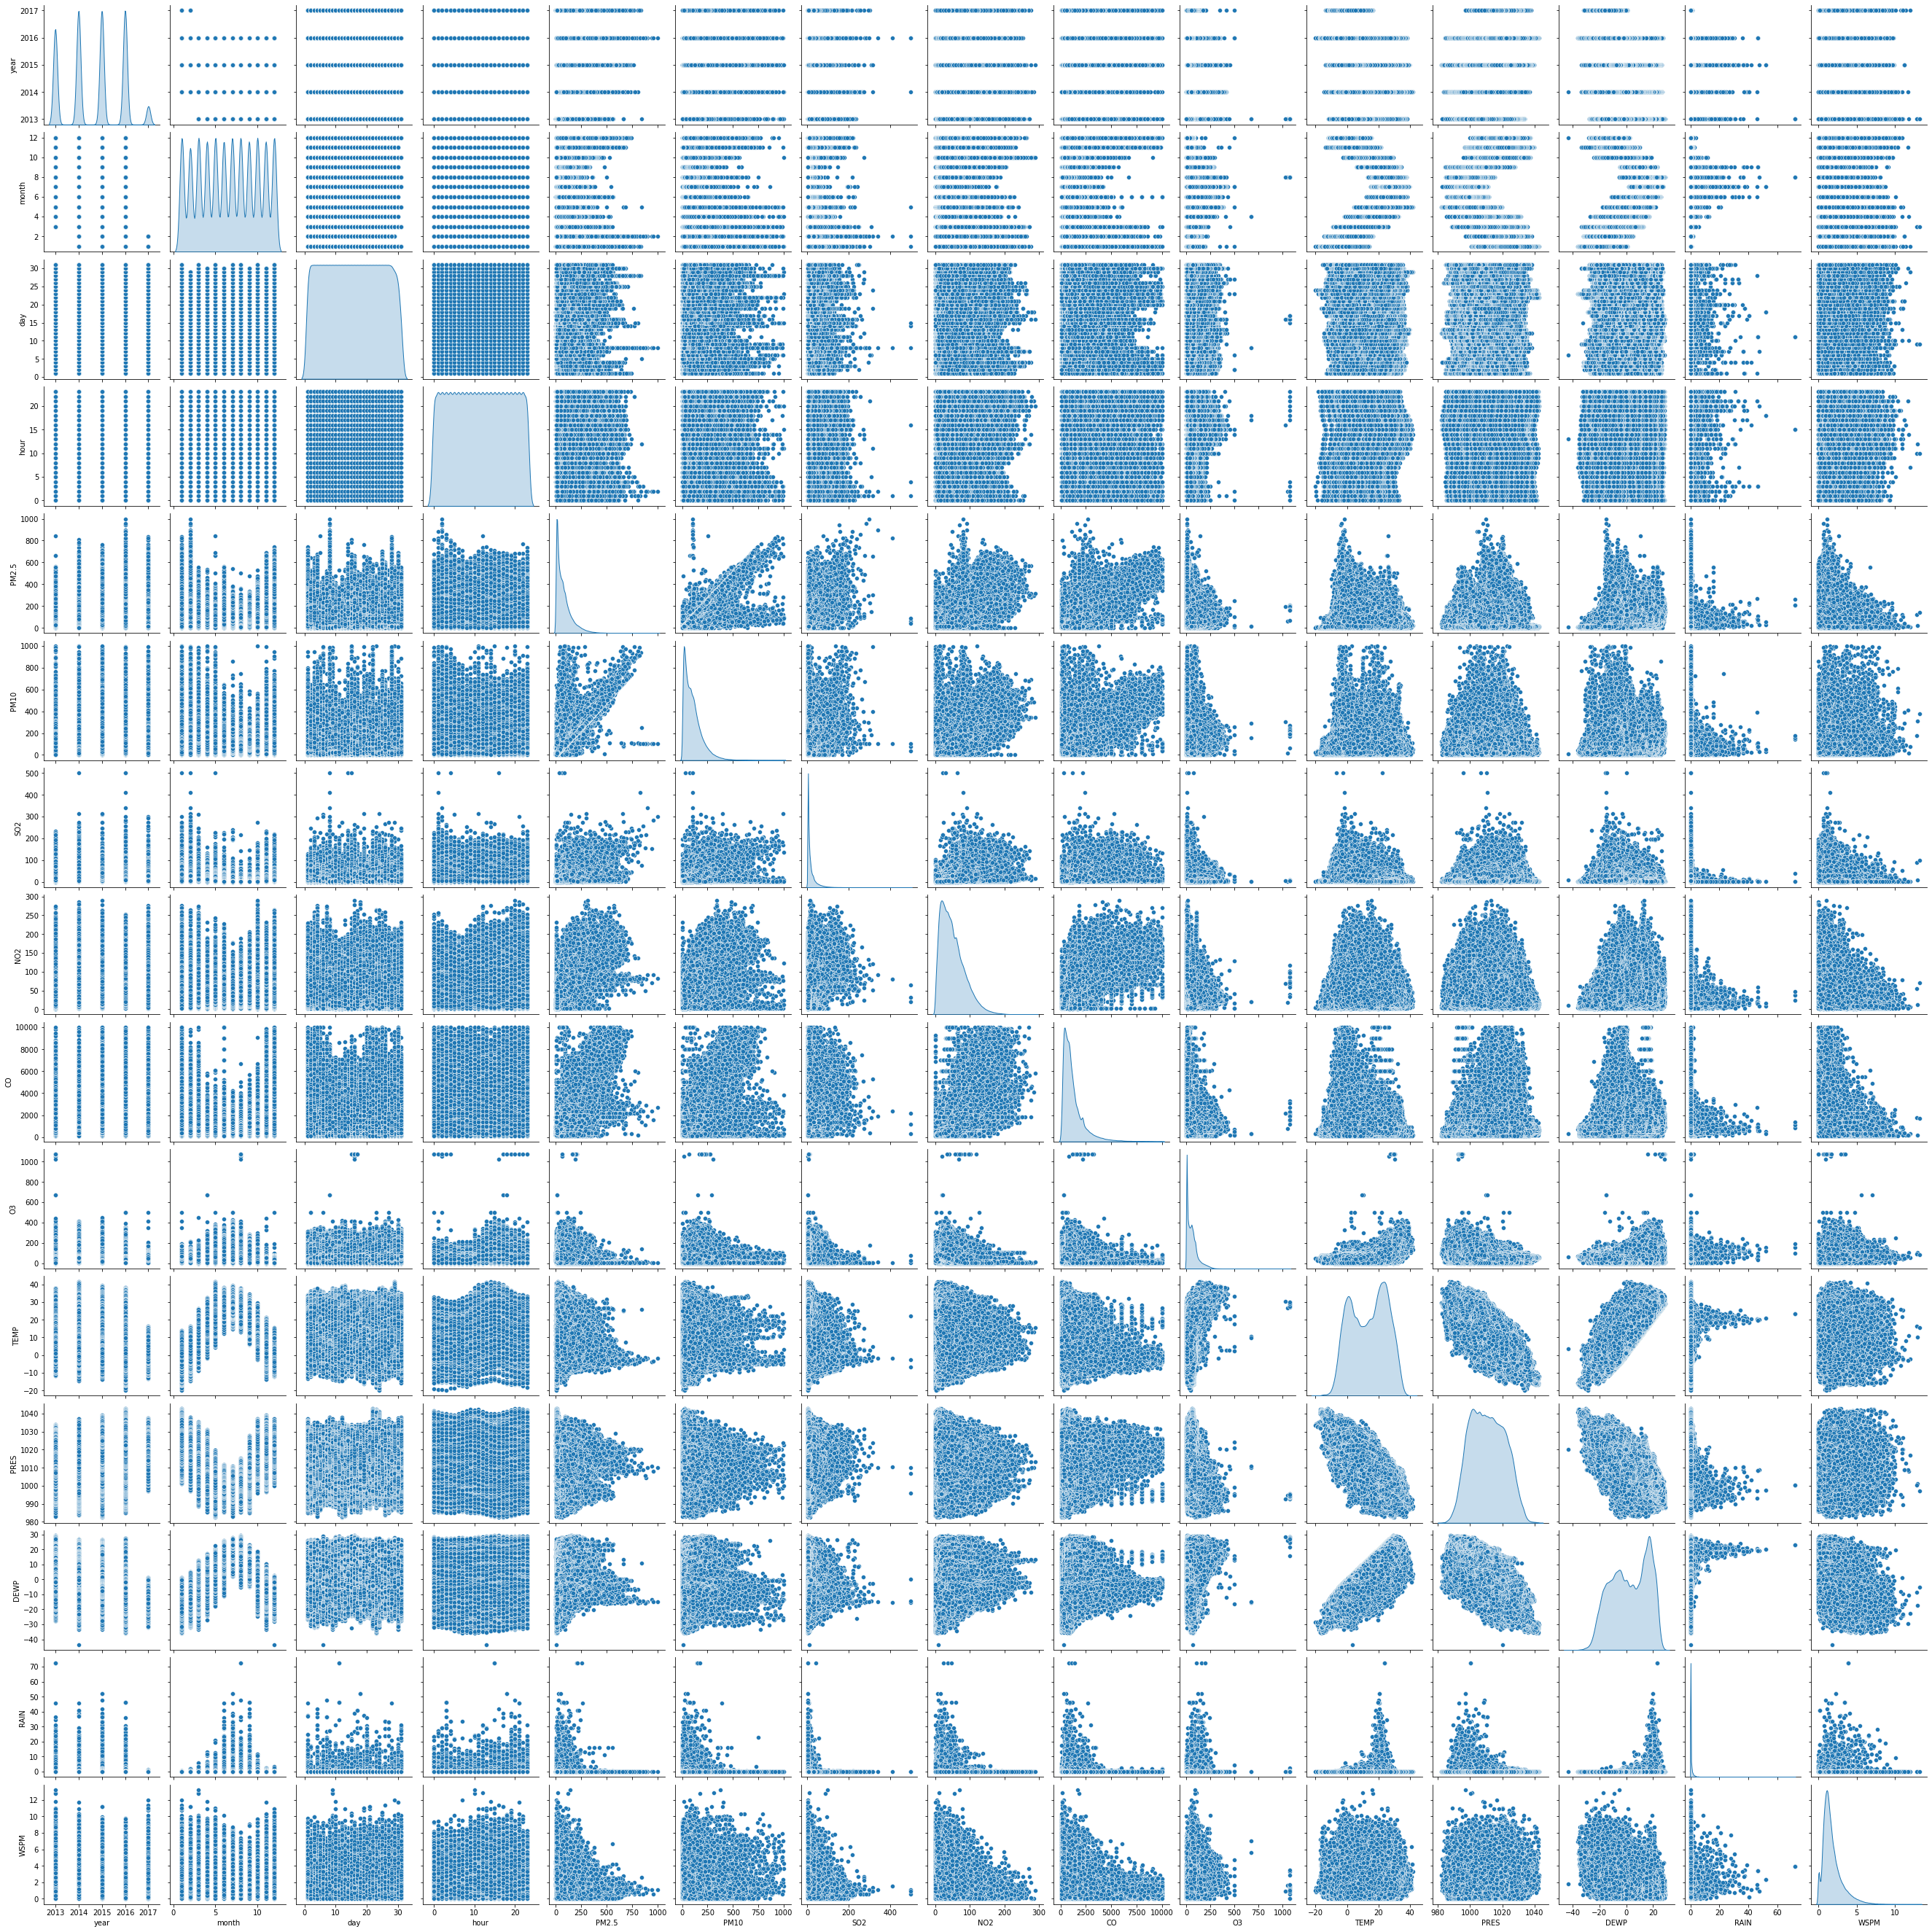

In [188]:
show_pair_plot(filled_df)

In [189]:
def show_correlation_matrix(dataframe):
    correlation_matrix = dataframe.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

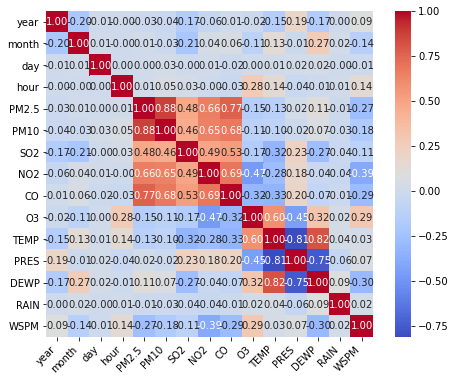

In [190]:
show_correlation_matrix(filled_df)

In [191]:
def remove_high_correlation_columns(dataframe, threshold=0.8):
    correlation_matrix = dataframe.corr().abs()
    upper_triangle = correlation_matrix.where(pd.np.triu(pd.np.ones(correlation_matrix.shape), k=1).astype(bool))
    columns_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    dataframe_filtered = dataframe.drop(columns=columns_to_drop)
    return dataframe_filtered

In [192]:
filtered_df = remove_high_correlation_columns(filled_df, threshold=0.8)
print(filtered_df)

       year  month  day  hour  PM2.5   SO2   NO2     CO    O3  TEMP  RAIN  \
0      2013      3    1     0    4.0   4.0   7.0  300.0  77.0  -0.7   0.0   
1      2013      3    1     1    8.0   4.0   7.0  300.0  77.0  -1.1   0.0   
2      2013      3    1     2    7.0   5.0  10.0  300.0  73.0  -1.1   0.0   
3      2013      3    1     3    6.0  11.0  11.0  300.0  72.0  -1.4   0.0   
4      2013      3    1     4    3.0  12.0  12.0  300.0  72.0  -2.0   0.0   
...     ...    ...  ...   ...    ...   ...   ...    ...   ...   ...   ...   
35059  2017      2   28    19   11.0   3.0  24.0  400.0  72.0  12.5   0.0   
35060  2017      2   28    20   13.0   3.0  41.0  500.0  50.0  11.6   0.0   
35061  2017      2   28    21   14.0   4.0  38.0  500.0  54.0  10.8   0.0   
35062  2017      2   28    22   12.0   4.0  30.0  400.0  59.0  10.5   0.0   
35063  2017      2   28    23   13.0   4.0  38.0  600.0  49.0   8.6   0.0   

        wd  WSPM        station  
0      NNW   4.4   Aotizhongxin  
1      

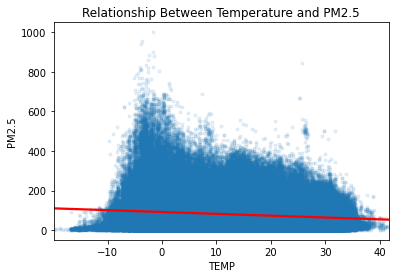

In [193]:
#check the relation between Temp and PM2.5

sns.regplot(x='TEMP', y='PM2.5', data=filled_df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"r"})
plt.title('Relationship Between Temperature and PM2.5')
plt.show()



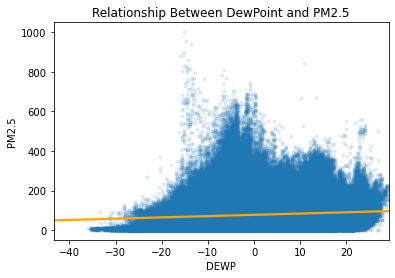

In [194]:
#check the relation between DEWP and PM2.5
sns.regplot(x='DEWP', y='PM2.5', data=filled_df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"orange"})
plt.title('Relationship Between DewPoint and PM2.5')
plt.show()

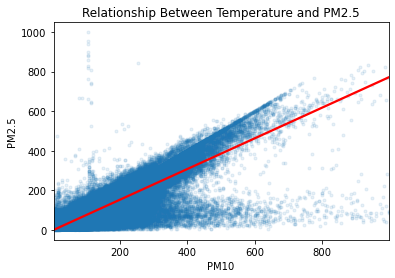

In [195]:
#check the relation between Temp and PM2.5

sns.regplot(x='PM10', y='PM2.5', data=filled_df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"r"})
plt.title('Relationship Between Temperature and PM2.5')
plt.show()

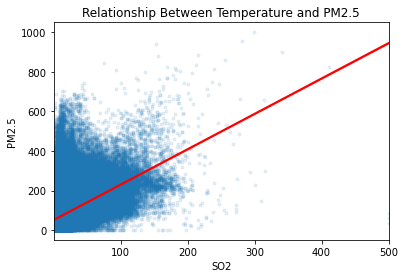

In [196]:
#check the relation between Temp and PM2.5

sns.regplot(x='SO2', y='PM2.5', data=filled_df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"r"})
plt.title('Relationship Between Temperature and PM2.5')
plt.show()

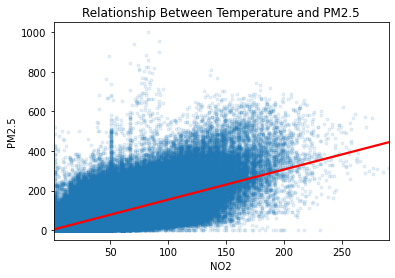

In [197]:
#check the relation between Temp and PM2.5

sns.regplot(x='NO2', y='PM2.5', data=filled_df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"r"})
plt.title('Relationship Between Temperature and PM2.5')
plt.show()

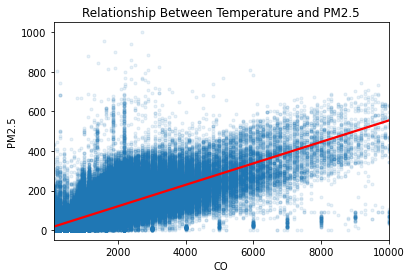

In [198]:
#check the relation between Temp and PM2.5

sns.regplot(x='CO', y='PM2.5', data=filled_df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"r"})
plt.title('Relationship Between Temperature and PM2.5')
plt.show()

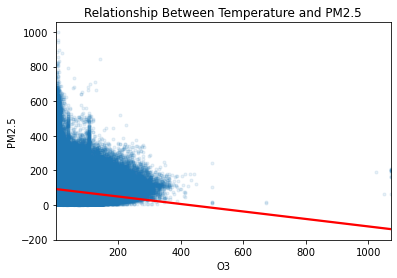

In [199]:
#check the relation between Temp and PM2.5

sns.regplot(x='O3', y='PM2.5', data=filled_df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"r"})
plt.title('Relationship Between Temperature and PM2.5')
plt.show()

Yearly Analysis

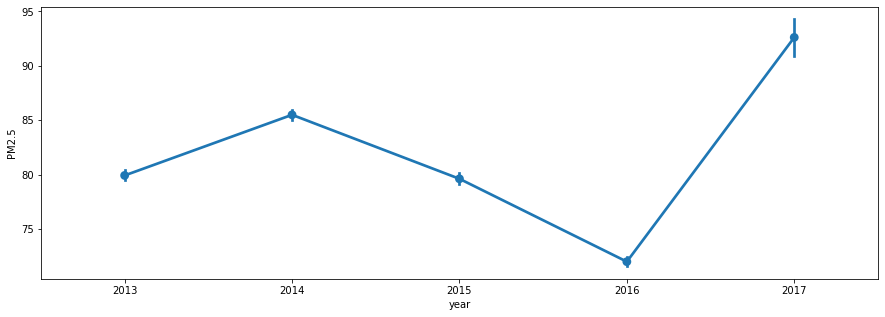

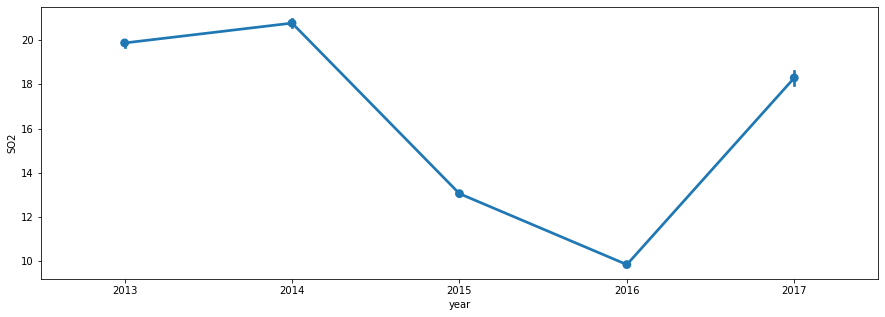

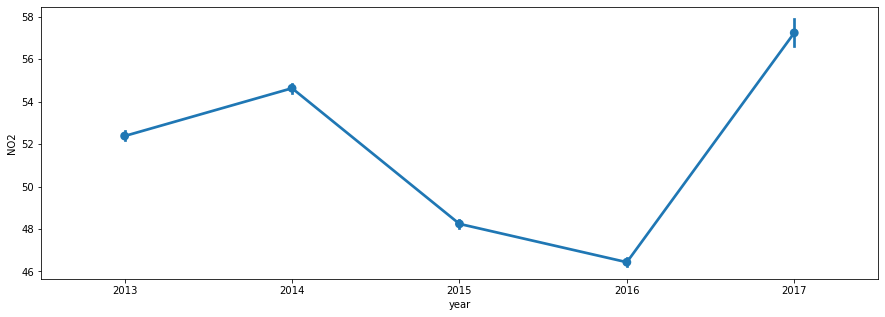

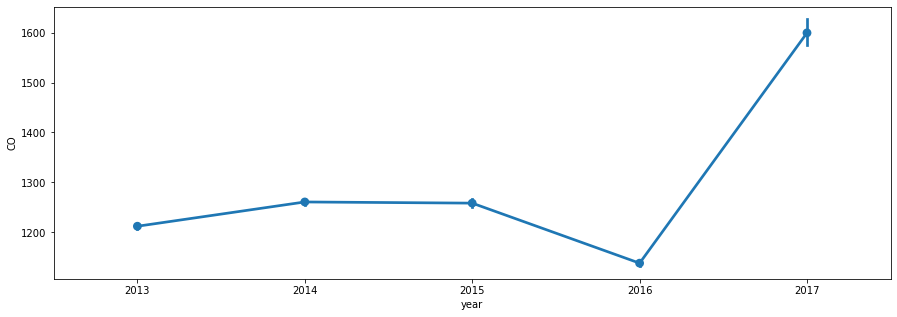

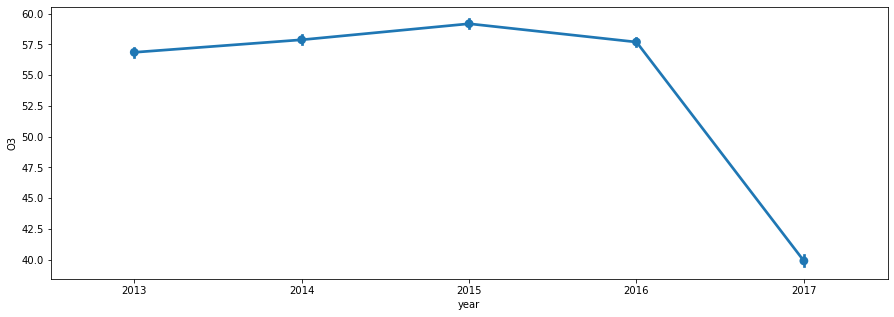

In [200]:
compounds = ["PM2.5", "SO2", "NO2", "CO", "O3"]
for i in compounds:    
    df = filtered_df[[i, 'year']].groupby(["year"]).mean().reset_index().sort_values(by='year', ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='year', y=i, data=filtered_df)



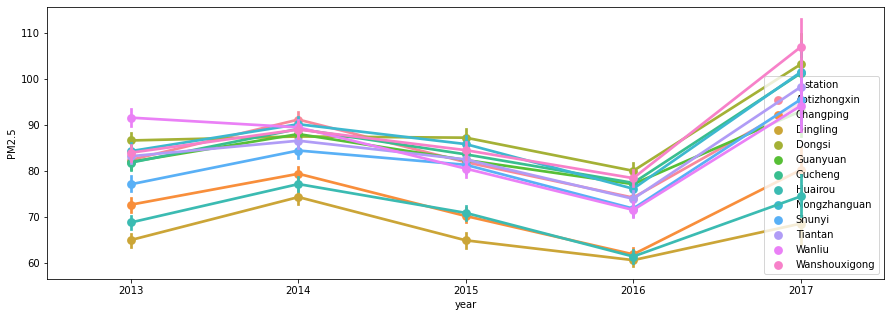

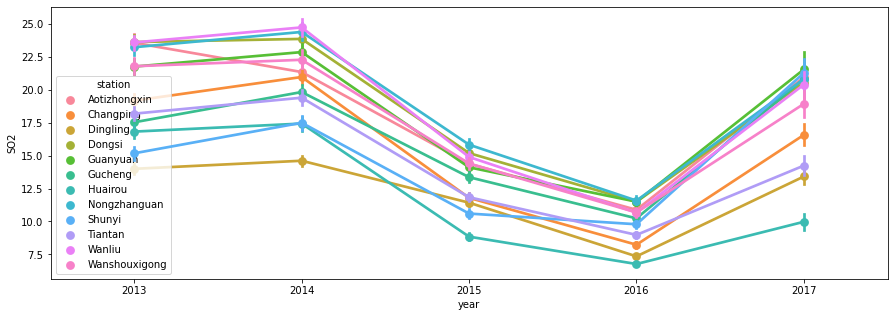

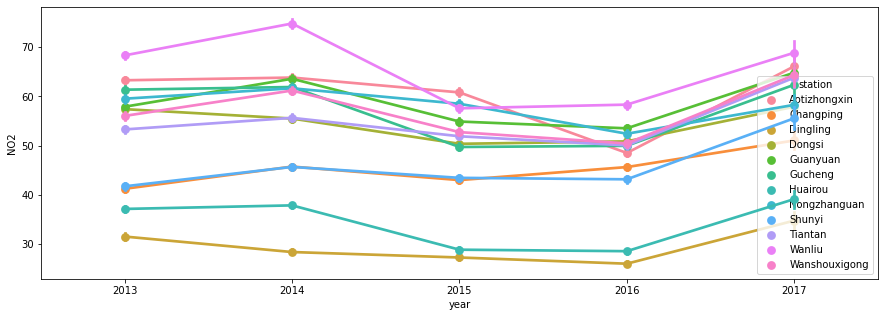

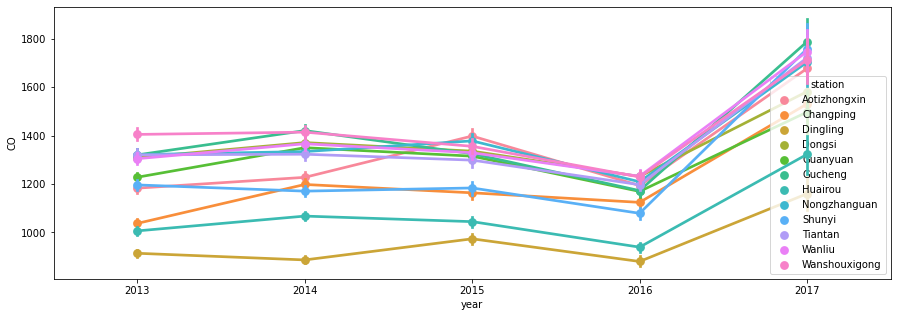

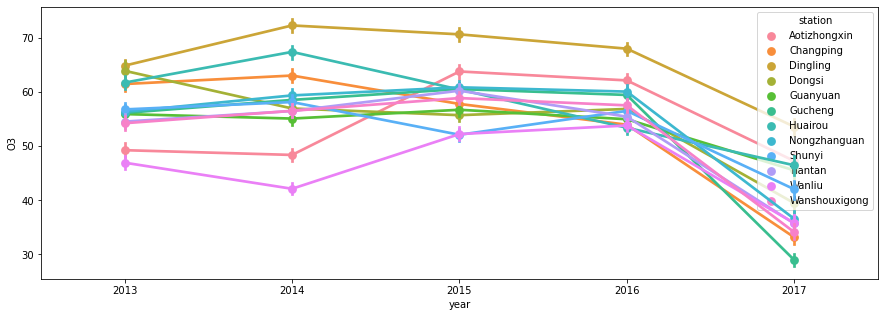

In [201]:
for i in compounds:  
    df = filtered_df[[i, 'year', 'station']].groupby(["year",
                                               "station"]).mean().reset_index().sort_values(by=['station',
                                                                                                'year'], ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='year', y=i, data=filtered_df, hue="station")
    plt.show()

Preprocessing

In [202]:
from sklearn.preprocessing import LabelEncoder
# define a function for label encoding
def label_encode_columns(dataframe, columns):
    le = LabelEncoder()
    for column in columns:
        dataframe[column] = le.fit_transform(dataframe[column])
    return dataframe

In [203]:

columns_to_encode = ['wd', 'station']
encoded_df = label_encode_columns(filtered_df, columns_to_encode)
print(encoded_df)



       year  month  day  hour  PM2.5   SO2   NO2     CO    O3  TEMP  RAIN  wd  \
0      2013      3    1     0    4.0   4.0   7.0  300.0  77.0  -0.7   0.0   6   
1      2013      3    1     1    8.0   4.0   7.0  300.0  77.0  -1.1   0.0   3   
2      2013      3    1     2    7.0   5.0  10.0  300.0  73.0  -1.1   0.0   6   
3      2013      3    1     3    6.0  11.0  11.0  300.0  72.0  -1.4   0.0   7   
4      2013      3    1     4    3.0  12.0  12.0  300.0  72.0  -2.0   0.0   3   
...     ...    ...  ...   ...    ...   ...   ...    ...   ...   ...   ...  ..   
35059  2017      2   28    19   11.0   3.0  24.0  400.0  72.0  12.5   0.0   7   
35060  2017      2   28    20   13.0   3.0  41.0  500.0  50.0  11.6   0.0  14   
35061  2017      2   28    21   14.0   4.0  38.0  500.0  54.0  10.8   0.0   7   
35062  2017      2   28    22   12.0   4.0  30.0  400.0  59.0  10.5   0.0   6   
35063  2017      2   28    23   13.0   4.0  38.0  600.0  49.0   8.6   0.0   5   

       WSPM  station  
0   

In [204]:
encoded_df.head()

year  month  day  hour  PM2.5   SO2   NO2     CO    O3  TEMP  RAIN  wd  \
0  2013      3    1     0    4.0   4.0   7.0  300.0  77.0  -0.7   0.0   6   
1  2013      3    1     1    8.0   4.0   7.0  300.0  77.0  -1.1   0.0   3   
2  2013      3    1     2    7.0   5.0  10.0  300.0  73.0  -1.1   0.0   6   
3  2013      3    1     3    6.0  11.0  11.0  300.0  72.0  -1.4   0.0   7   
4  2013      3    1     4    3.0  12.0  12.0  300.0  72.0  -2.0   0.0   3   

   WSPM  station  
0   4.4        0  
1   4.7        0  
2   5.6        0  
3   3.1        0  
4   2.0        0

In [205]:
# create input and output
X = encoded_df.drop('PM2.5', axis = 1)
y = encoded_df['PM2.5']

In [206]:
# for train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=128)

# see train and test dataset shape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (336614, 13)
y_train: (336614,)
X_test: (84154, 13)
y_test: (84154,)


In [215]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

def allRegressors(X_train, X_test, y_train, y_test):
    linear_reg = LinearRegression()
    regressors = [
        RandomForestRegressor(),
        GradientBoostingRegressor(),
        KNeighborsRegressor(),
        DecisionTreeRegressor()
    ]
    
    mae_scores = []
    rmse_scores = []
    
    # Linear Regression
    linear_reg.fit(X_train, y_train)
    y_pred = linear_reg.predict(X_test)
    mae_score = mean_absolute_error(y_test, y_pred)
    rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"Linear Regression Mean Absolute Error: {mae_score}")
    print(f"Linear Regression Root Mean Square Error: {rmse_score}")
    
    mae_scores.append(mae_score)
    rmse_scores.append(rmse_score)
    
    # Other Regressors
    for regressor in regressors:
        name = regressor.__class__.__name__
        model = regressor.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae_score = mean_absolute_error(y_test, y_pred)
        rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
        
        print(f"{name} Mean Absolute Error: {mae_score}")
        print(f"{name} Root Mean Square Error: {rmse_score}")
        
        mae_scores.append(mae_score)
        rmse_scores.append(rmse_score)
    


In [216]:
allRegressors(X_train, X_test, y_train, y_test)

Linear Regression Mean Absolute Error: 30.930237754701785
Linear Regression Root Mean Square Error: 47.372100048978474
RandomForestRegressor Mean Absolute Error: 15.41497354062129
RandomForestRegressor Root Mean Square Error: 25.585542241277654
GradientBoostingRegressor Mean Absolute Error: 26.587707496671825
GradientBoostingRegressor Root Mean Square Error: 41.3875034494744
KNeighborsRegressor Mean Absolute Error: 24.524462265559897
KNeighborsRegressor Root Mean Square Error: 40.134724780812114
DecisionTreeRegressor Mean Absolute Error: 21.208433334023134
DecisionTreeRegressor Root Mean Square Error: 38.04686204658183
